### Analysis of SRX7724693: RNA-Seq of Rhinolophus affinis: Anal swab

Study: Discovery of Bat Coronaviruses through Surveillance and Probe Capture-Based Next-Generation Sequencing.

- PRJNA606159 
- SRP249478 

https://www.ncbi.nlm.nih.gov/sra/SRX7724693[accn]



Here we ran Blastn against several thousand raw reads to get hits with >95% similaity, to use this dataset as a QC against other anlyses in this repository.


In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from Bio import SeqIO

In [2]:
DATA_PATH='../../'
PROJECT='SRX7724693'
BLAST_OUT=DATA_PATH+PROJECT+'/Blastn/dataframes/'

### Read in data

Takes forematted csv file(s) generated in Blast_hit_file_formatter.ipynb as input 

In [3]:
fpath=BLAST_OUT+PROJECT+'_HKU2_160660_R1_blast_hits.csv'
fpath

'../../SRX7724693/Blastn/dataframes/SRX7724693_HKU2_160660_R1_blast_hits.csv'

In [4]:
df =pd.read_csv(BLAST_OUT+PROJECT+'_HKU2_160660_R1_blast_hits.csv')
len(df)

1507

### Uniqe sequence hits

Get all unique sequence hits, short from most to least frequennt, then plot the frequency

Note all percentages calculated below for taxonomic analysis are based on a percentage of the hits.

In [5]:
titles=df.text_title.to_list()

In [6]:
seqs, counts = np.unique(titles, return_counts=True)

In [7]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

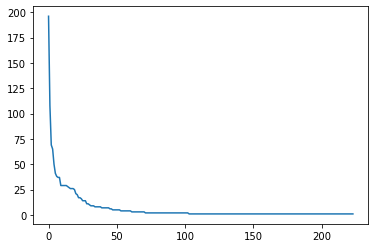

In [8]:
plt.plot(counts)

Most common ten frequencies

In [9]:
counts[:10]

(196, 108, 69, 65, 50, 41, 38, 37, 37, 29)

List all the unique sequence matches (in order from most to least common)

In [10]:
seqs

('Clostridium perfringens strain 4928STDY7387880 genome assembly, chromosome: 1,',
 'Paraclostridium bifermentans strain Cbm chromosome,',
 'Shigella sonnei strain SE6-1 chromosome, complete genome,',
 'Clostridium chauvoei strain SBP 07/09 chromosome, complete genome,',
 'Enterococcus faecalis strain 133170041-3 chromosome, complete genome,',
 'Pasteurellaceae bacterium RH1A chromosome, complete genome,',
 'Romboutsia sp. Frifi strain FRIFI genome assembly, chromosome: chromosome1,',
 'Clostridium butyricum strain 16-3 chromosome 1, complete sequence,',
 'Cellulosilyticum sp. WCF-2 chromosome, complete genome,',
 'Romboutsia sp. CE17 chromosome, complete genome,',
 'PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA,',
 'Hirundo smithii voucher B-39509 external transcribed spacer, partial sequence; 18S ribosomal RNA gene, complete sequence; and internal transcribed spacer 1, partial sequence,',
 'Clostridium perfringens strain 4928STDY7387940 genome assembly, chromosome: 1

For SRR11085736, we see a dominance of bacteria

Percentage of human sequence matches in the raw reads

In [11]:
human = [x for x in titles if 'Human' in x]
homo_sapiens = [x for x in titles if 'Homo sapiens' in x]
print(f'Homo sapiens percentage: {((len(human)+len(homo_sapiens))/len(titles))*100}')

Homo sapiens percentage: 0.92899800928998


### Bat sequence content

Calculate percent of the following bat species and covs as percentage of the blast hits

In [12]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus', 'Pteropus']

In [13]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]
bat_pt = [x for x in titles if 'Pteropus' in x.lower()]

In [14]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)+len(bat_pt)
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 0.0


### Synthetic and BAC clones

In [15]:
synthetic=[x for x in titles if 'synthetic' in x.lower()]
bac=[x for x in titles if ' bac ' in x.lower()]

In [16]:
len(synthetic), synthetic

(0, [])

In [17]:
len(bac), bac

(0, [])

Run same on CAP_160660_R1 dataset

(ie hits from CAP_160660_R1_180307.fastq.gz)

In [18]:
df =pd.read_csv(BLAST_OUT+PROJECT+'_CAP_160660_R1_blast_hits.csv')
len(df)

1549

### Uniqe sequence hits

Get all unique sequence hits, short from most to least frequennt, then plot the frequency

Note all percentages calculated below for taxonomic analysis are based on a percentage of the hits.

In [19]:
titles=df.text_title.to_list()

In [20]:
seqs, counts = np.unique(titles, return_counts=True)

In [21]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

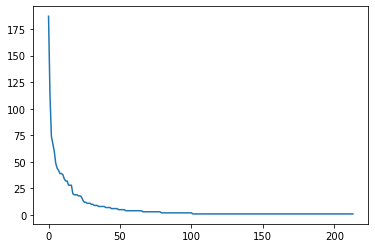

In [22]:
plt.plot(counts)

Most common ten frequencies

In [23]:
counts[:10]

(187, 113, 74, 67, 60, 49, 44, 42, 39, 39)

List all the unique sequence matches (in order from most to least common)

In [24]:
seqs

('Clostridium perfringens strain 4928STDY7387880 genome assembly, chromosome: 1,',
 'Paraclostridium bifermentans strain Cbm chromosome,',
 'Shigella sonnei strain SE6-1 chromosome, complete genome,',
 'Clostridium chauvoei strain SBP 07/09 chromosome, complete genome,',
 'Romboutsia sp. Frifi strain FRIFI genome assembly, chromosome: chromosome1,',
 'Pasteurellaceae bacterium RH1A chromosome, complete genome,',
 'Hirundo smithii voucher B-39509 external transcribed spacer, partial sequence; 18S ribosomal RNA gene, complete sequence; and internal transcribed spacer 1, partial sequence,',
 'Romboutsia ilealis strain CRIB genome assembly, chromosome: chr1,',
 'Paeniclostridium sordellii strain AM370 chromosome, complete genome,',
 'Enterococcus faecalis strain 133170041-3 chromosome, complete genome,',
 'Clostridium baratii strain CDC51267 chromosome, complete genome,',
 'Clostridium butyricum strain 16-3 chromosome 1, complete sequence,',
 'Clostridium glycolicum strain DSM 1288 23S rib

Percentage of human sequence matches in the raw reads

In [25]:
human = [x for x in titles if 'Human' in x]
homo_sapiens = [x for x in titles if 'Homo sapiens' in x]
print(f'Homo sapiens percentage: {((len(human)+len(homo_sapiens))/len(titles))*100}')

Homo sapiens percentage: 1.4848289218850872


### Bat sequence content

Calculate percent of the following bat species and covs as percentage of the blast hits

In [26]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus', 'Pteropus']

In [27]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]
bat_pt = [x for x in titles if 'Pteropus' in x.lower()]

In [28]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)+len(bat_pt)
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 0.9683666881859263


### Synthetic and BAC clones

In [29]:
synthetic=[x for x in titles if 'synthetic' in x.lower()]
bac=[x for x in titles if ' bac ' in x.lower()]

In [30]:
len(synthetic), synthetic

(0, [])

In [31]:
len(bac), bac

(0, [])